In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('files//result.txt', sep=' ', header=None)
df = df.drop([0, 2, 4], axis=1)
df.columns = ['Size', '№', 'Time']

In [7]:
df.head(3)

,Size,№,Time
0,100,1,0.019
1,100,2,0.024
2,100,3,0.021


In [9]:
df.groupby('Size')['Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Size,,,,,,,,
100,3.0,0.021333,0.002517,0.019,0.0200,0.021,0.0225,0.024
250,3.0,0.223667,0.021079,0.211,0.2115,0.212,0.2300,0.248
500,3.0,1.152000,0.068739,1.077,1.1220,1.167,1.1895,1.212
750,3.0,4.152333,0.080208,4.069,4.1140,4.159,4.1940,4.229
1000,3.0,8.595000,0.162748,8.424,8.5185,8.613,8.6805,8.748
1500,3.0,15.113333,0.148971,14.958,15.0425,15.127,15.1910,15.255
2000,3.0,40.953667,0.128598,40.809,40.9030,40.997,41.0260,41.055
3000,3.0,75.509000,0.530342,74.955,75.2575,75.560,75.7860,76.012


In [15]:
for size, group in df.groupby('Size'):
    data = group['Time']
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    z = 1.96 

    lower_bound = mean - z * (std / np.sqrt(n))
    upper_bound = mean + z * (std / np.sqrt(n))

    print(f"Dov Intervals for Size {size}: ({lower_bound}, {upper_bound})")

Dov Intervals for Size 100: (0.019008102958446512, 0.023658563708220153)
Dov Intervals for Size 250: (0.20419046504443986, 0.24314286828889345)
Dov Intervals for Size 500: (1.0884887411556028, 1.215511258844397)
Dov Intervals for Size 750: (4.078224864281645, 4.226441802385023)
Dov Intervals for Size 1000: (8.444628268614077, 8.745371731385921)
Dov Intervals for Size 1500: (14.975691230816754, 15.250975435849917)
Dov Intervals for Size 2000: (40.834848580002564, 41.07248475333078)
Dov Intervals for Size 3000: (75.01898867568642, 75.99901132431359)


In [34]:
sizes = []
times = []

with open("C://parallel_prog//lab_1//files//result.txt", "r") as file:
    for line in file:
        parts = line.split()
        sizes.append(int(parts[1]))
        times.append(float(parts[3]))

data = {'Size': sizes, 'Time': times}
df2 = pd.DataFrame(data)

In [35]:
df2

,Size,Time
0,100,0.019
1,250,0.339
2,500,2.444
3,750,8.681
4,1000,20.355
5,1500,70.330
6,2000,165.859
7,3000,542.982


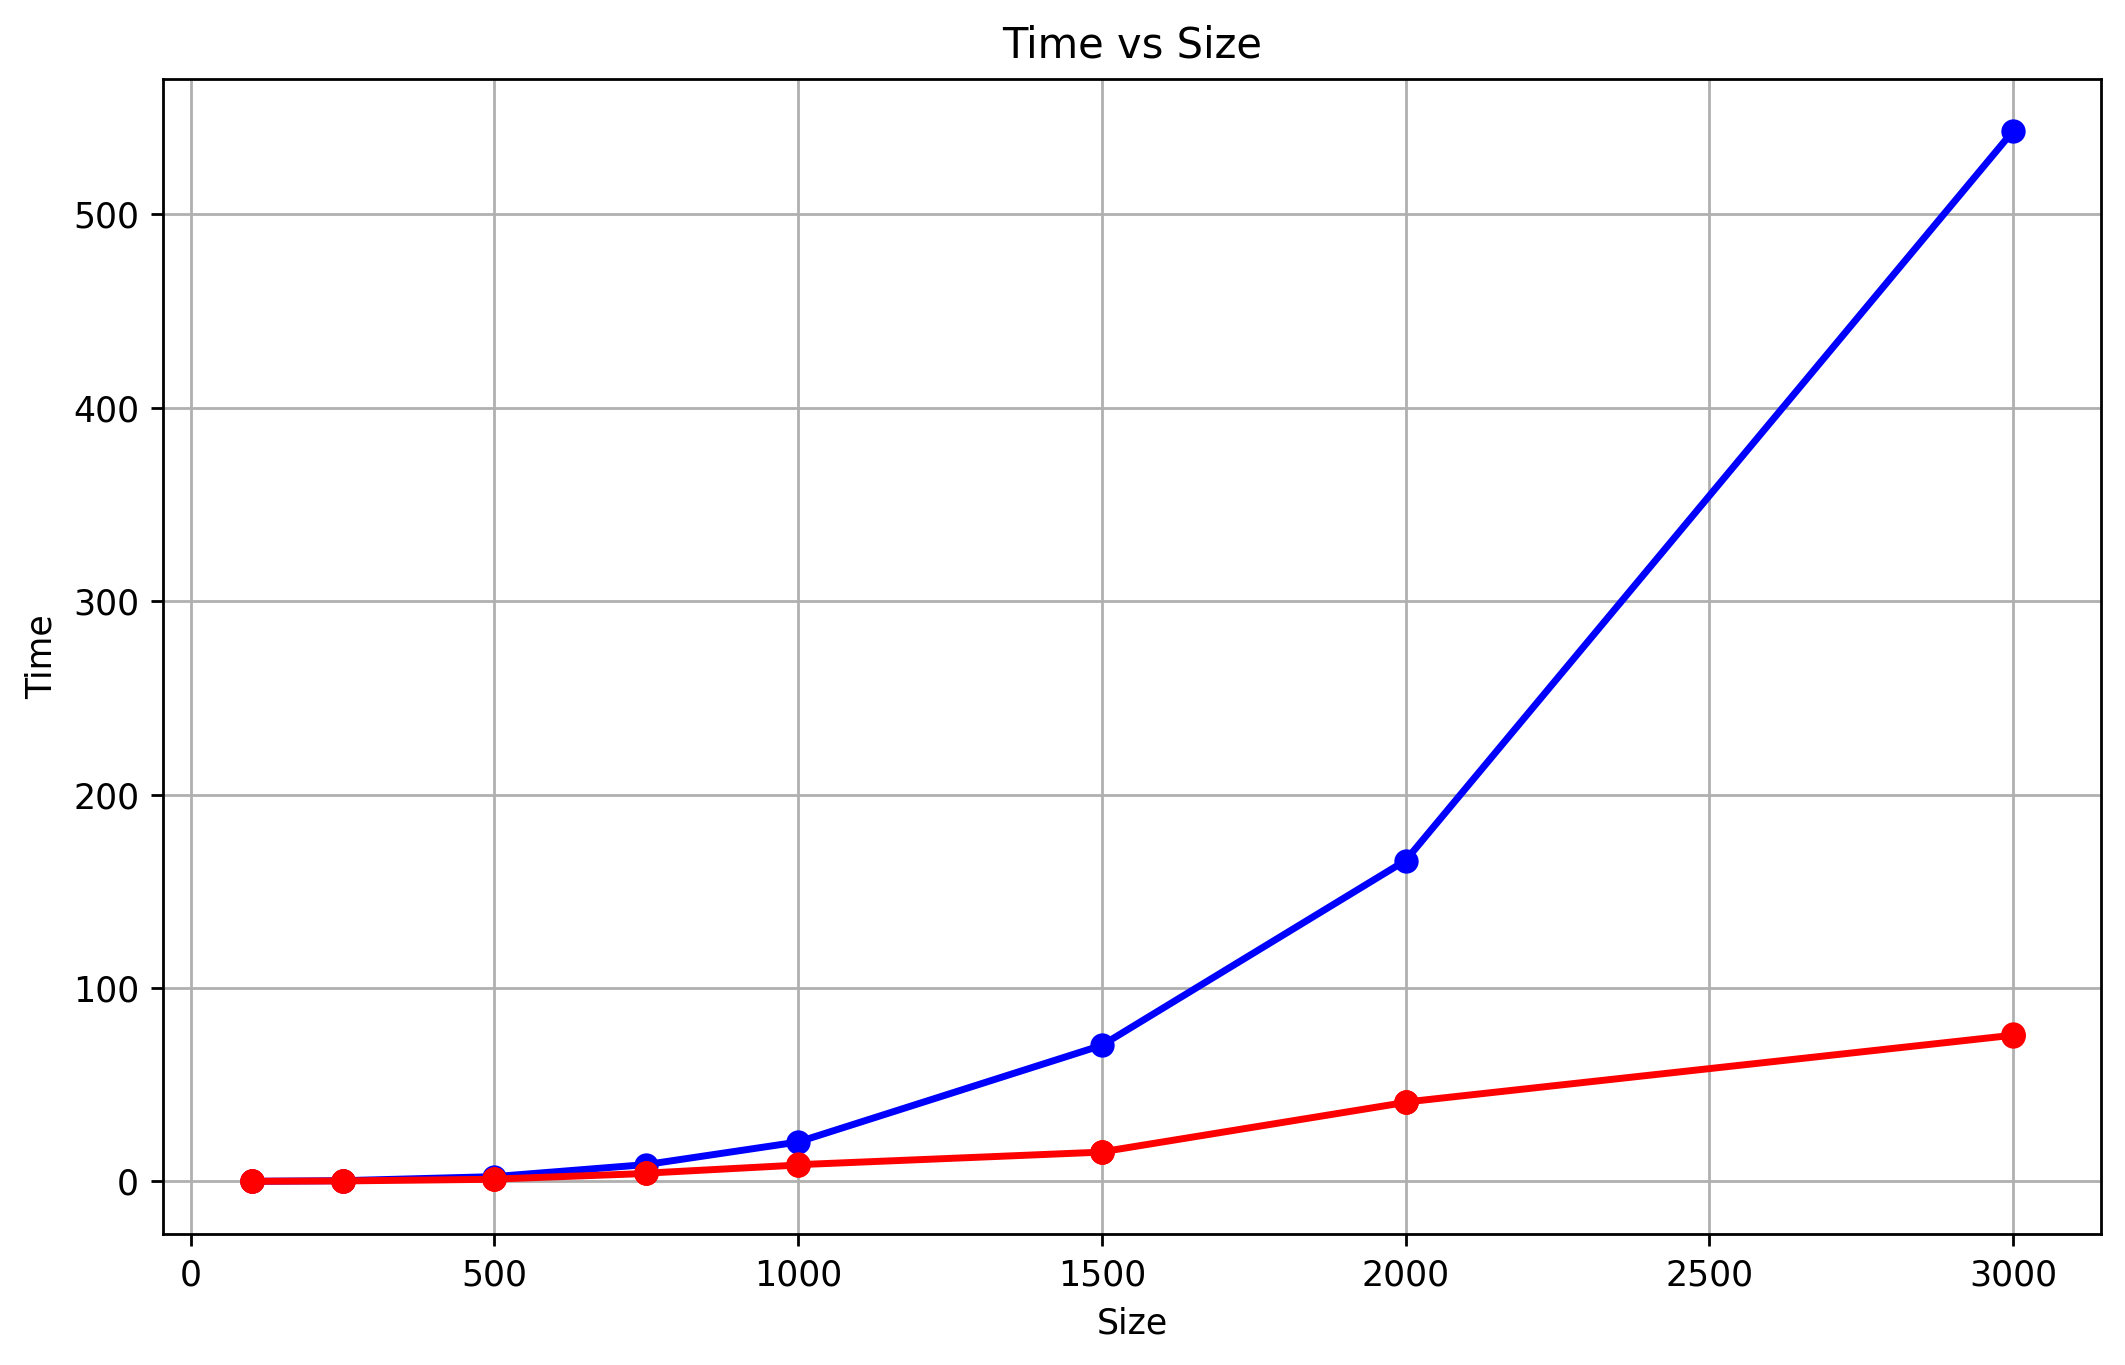

In [38]:
plt.figure(figsize=(10, 6), dpi=250)
plt.plot(df2['Size'], df2['Time'], marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(df['Size'], df['Time'], marker='o', color='r', linestyle='-', linewidth=2)
plt.title('Time vs Size')
plt.xlabel('Size')
plt.ylabel('Time')
plt.grid(True)
plt.savefig('files/plot.png')
plt.show()